In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

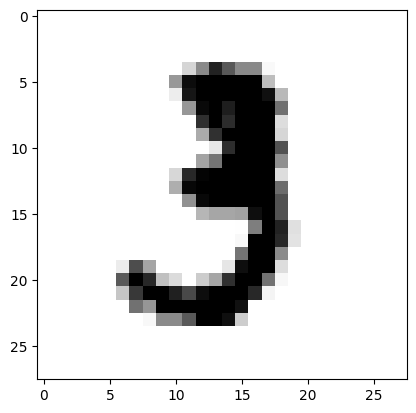

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_train[10], cmap='binary')
plt.show()

In [5]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
#ONE HOT ENCODING
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [7]:
#PREPROCESSING
#Unrolling n-dimensional array into a vector
import numpy as np
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
x_train_reshaped[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  42, 118, 219, 166, 118, 118,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254, 254, 254,
       254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  18, 232, 25

In [8]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon=1e-10   
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

In [9]:
x_test_norm[10]

array([-0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42407389,
       -0.42407389, -0.42407389, -0.42407389, -0.42407389, -0.42

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(x_train_norm, y_train_encoded, epochs=5)
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8920
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1835 - accuracy: 0.9463
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1401 - accuracy: 0.9582
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144 - accuracy: 0.9659
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1058 - accuracy: 0.9678


In [12]:
preds=model.predict(x_test_norm)
print("Shape of preds:", preds.shape)

313/313 [==============================] - 0s 1ms/step
Shape of preds: (10000, 10)


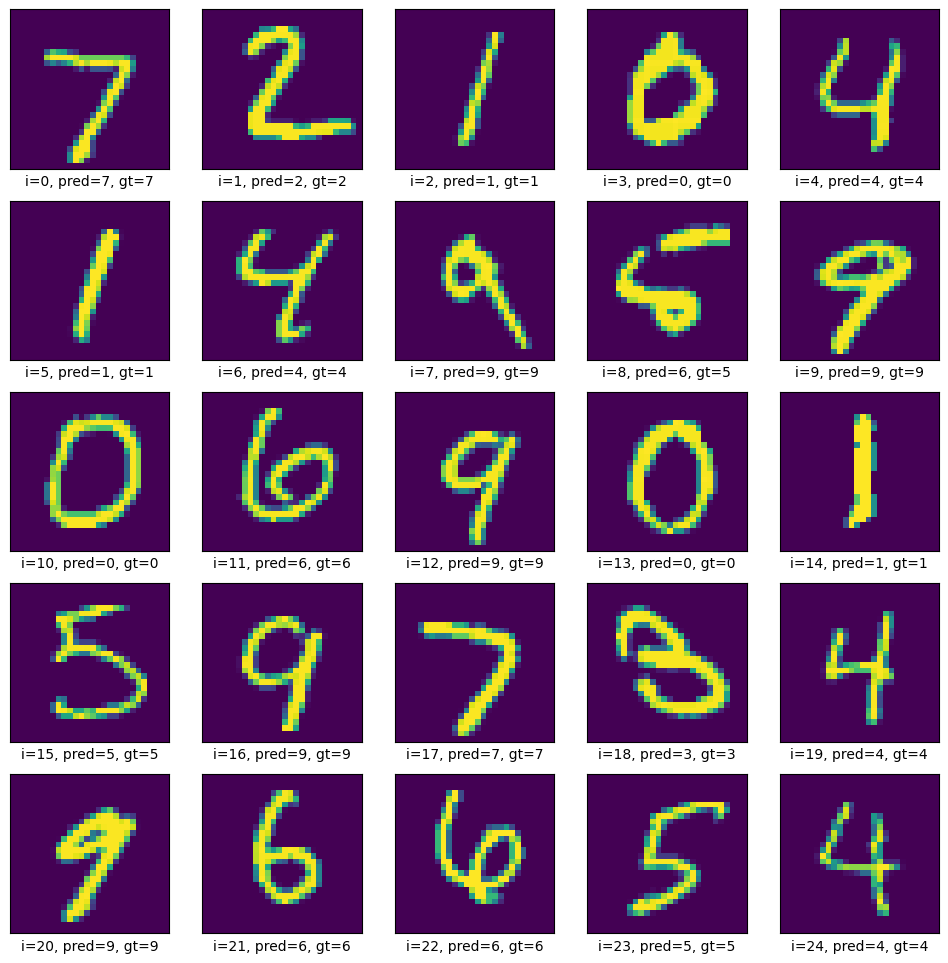

In [14]:
plt.figure(figsize=(12,12))
# start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[i])
    gt=y_test[i]
    
    plt.xlabel("i={}, pred={}, gt={}".format(i, pred, gt))
    plt.imshow(x_test[i])
plt.show()